In [1]:
import math
import numpy as np
import scipy
import matplotlib.pyplot as plt
plt.style.use('./presentation.mplstyle')

import plot
import utils

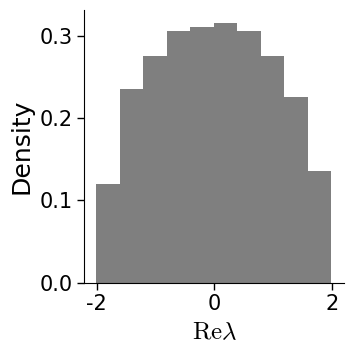

In [ ]:
N = 500
J = 1

# Wij=Wji~Gaussian(0,J**2/N)
Wod = np.random.randn(int(N*(N-1)/2))*J/math.sqrt(N)   # off-diagonal terms
Wd = np.random.randn(N)*J/math.sqrt(N)                 # diagonal terms
W = scipy.spatial.distance.squareform(Wod)+np.diag(Wd)
z = np.linalg.eigvals(W) 

fig, s = plt.subplots(1, 1, figsize=(4, 4))
cx = s
plot.show_real_spectrum(cx, z)

#fig.suptitle('Gaussian Orthogonal Ensemble => Wigner semicircle law', fontsize="small")
name = utils.get_script_name()
fig.savefig("../images/%s.png"%name)